In [1]:
#  Predict Titanic Survival
#The RMS Titanic set sail on its maiden voyage in 1912, crossing the Atlantic from Southampton, England to New York City. The ship never completed the voyage, sinking to the bottom of the Atlantic Ocean after hitting an iceberg, bringing down 1,502 of 2,224 passengers onboard.
#In this project you will create a Logistic Regression model that predicts which passengers survived the sinking of the Titanic, based on features like age and class.
#The data we will be using for training our model is provided by Kaggle. Feel free to make the model better on your own and submit it to the Kaggle Titanic competition!
#If you get stuck during this project or would like to see an experienced developer copmplete it, check out the project walkthrough video which can be found in the “get help” menu in the bottom-right of this window.

In [3]:
import seaborn
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
#1. The file passengers.csv contains the data of 892 passengers onboard the Titanic when it sank that fateful day.
#Let’s begin by loading the data into a pandas DataFrame named passengers. 
#Print passengers and inspect the columns. What features could we use to predict survival?

In [5]:
train = pd.read_csv('passengers.csv', delimiter =',')
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
test= pd.read_csv("test.csv")
#print(train.head())
#print(test.head())

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
passengers=pd.read_csv('passengers.csv')
outcomes=passengers['Survived']
data =passengers.drop('Survived', axis = 1)


In [9]:
#2. Given the saying, “women and children first,” Sex and Age seem like good features to predict survival. 
#Let’s map the text values in the Sex column to a numerical value. 
#Update Sex such that all values female are replaced with 1 and all values male are replaced with 0. Turn column into integers.

In [10]:
train['Sex']=train['Sex'].map({'male':0, 'female': 1})
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [11]:
#3. Let’s take a look at Age. Print passengers['Age'].values. 
#You can see we have multiple missing values, or nans. Fill all the empty Age values in passengers with the mean age.
# inplace will modify passengers.Age, so it does not create a new column.
# # use the round function to round the mean value.

In [12]:
train['Age'].fillna(inplace=True, value=round(train['Age'].mean()))
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [13]:
#4 Given the strict class system onboard the Titanic, let’s utilize the Pclass column, or the passenger class, as another feature. 
#Create a new column named FirstClass that stores 1 for all passengers in first class and 0 for all other passengers.
#Use apply(), which will apply a specific lambda function to every single value inside of PClass.
#We can then use that to map each PClass value to a new value in the FirstClass column.

In [14]:
train['FirstClass']=train['Pclass'].apply(lambda p: 1 if p ==1 else 0)
print(train) ##now only FirstClass passengers have a 1 in their column.

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [15]:
#5 Create a new column named SecondClass that stores 1 for all passengers in second class and 0 for all other passengers.
#Print passengers and inspect the DataFrame to ensure all the updates have been made.

In [16]:
train['SecondClass']=train['Pclass'].apply(lambda p: 1 if p ==2 else 0)
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [17]:
#6 Now that we have cleaned our data, let’s select the columns we want to build our model on. 
# Select columns Sex, Age, FirstClass, and SecondClass and store them in a variable named features. Select column Survived and store it a variable named survival.
##Create an array

In [18]:
features=train[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survived=train['Survived']

In [19]:
#7 Split the data into training and test sets using sklearn‘s train_test_split() method. 
# We’ll use the training set to train the model and the test set to evaluate the model.

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(features, survived)

In [21]:
##Normalize the Data
#8 Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. 
# Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [22]:
scaler=StandardScaler()
train_features = scaler.fit_transform(train_features)

test_features = scaler.transform(test_features)

In [23]:
#9 Create a LogisticRegression model with sklearn and .fit() it on the training data.
# Fitting the model will perform gradient descent to find the feature coefficients that minimize the log-loss for the training data.

In [24]:
model = LogisticRegression()
model.fit(train_features, train_labels)
##this will train our model to recognize which type of passengers survived and which
#-type of passengers didn't survive based on the features (Sex, Age, FirstClass, SecondClass)

LogisticRegression()

In [25]:
#10 .score() the model on the training data and print the training score.
# Scoring the model on the training data will run the data through the model and make final classifications on survival for each passenger in the training set. 
# The score returned is the percentage of correct classifications, or the accuracy.

In [26]:
print(model.score(train_features, train_labels))  ##result: about an 80% accuracy rate

0.8248502994011976


In [27]:
#11 .score() the model on the test data and print the test score.
#Smilarly, scoring the model on the testing data will run the data through the model and make final classifications on survival for each passenger in the test set.
# w well did your model perform?

In [28]:
print(model.score(test_features, test_labels))  #result is almost the same as the train score

0.7219730941704036


In [27]:
#12 Print the feature coefficients determined by the model. 
# Which feature is most important in predicting survival on the sinking of the Titanic?

##Feature coefficients =Sex, Age, FirstClass, SecondClass. How significant were each of these feature coefficients in determining if someone survived.

In [28]:
print(model.score(test_features, test_labels))
print(model.coef_)  #the printed array results are in this order: Sex, Age, FirstClass, SecondClass. 

0.8161434977578476
[[ 1.17057909 -0.44783839  0.79688417  0.44172971]]


In [29]:
#13.Let’s use our model to make predictions on the survival of a few fateful passengers. Provided in the code editor is information for 3rd class passenger Jack and 1st class passenger Rose, stored in NumPy arrays. The arrays store 4 feature values, in the following order:
#Sex, represented by a 0 for male and 1 for female
#Age, represented as an integer in years
#FirstClass, with a 1 indicating the passenger is in first class
#SecondClass, with a 1 indicating the passenger is in second class
#A third array, You, is also provided in the code editor with empty feature values. Uncomment the line containing You and update the array with your information, or the information for some fictitious passenger. Make sure to enter all values as floats with a .!

In [30]:
Jack= np.array([0.0,20.0,0.0,0.0])
Rose= np.array([1.0,17.0,1.0,0.0])
You= np.array([0.0,47.0,0.0,1.0])

In [31]:
#14 Combine Jack, Rose, and You into a single NumPy array named sample_passengers

In [32]:
sample_passengers=np.array([Jack, Rose, You])

In [33]:
#15 Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. 
#Using the StandardScaler object created earlier, apply its .transform() method to sample_passengers and save the result to sample_passengers.
# Print sample_passengers to view the scaled features.

In [34]:
sample_passengers=scaler.transform(sample_passengers) ##normalize

In [35]:
#16 Who will survive, and who will sink? Use your model’s .predict() method on sample_passengers and print the result to find out.
# Want to see the probabilities that led to these predictions? Call your model’s .predict_proba() method on sample_passengers and print the result. 
#The 1st column is the probability of a passenger perishing on the Titanic, and the 2nd column is the probability of a passenger surviving the sinking (which was calculated by our model to make the final classification decision).

In [36]:
print(model.predict(sample_passengers))

print(model.predict_proba(sample_passengers))

[0 1 0]
[[0.86518191 0.13481809]
 [0.06882221 0.93117779]
 [0.84478121 0.15521879]]


In [37]:
# predict_proba Results: 
# [[0.88903321 0.11096679] Jack had an 88% chance of dying and an 11% chance of surviving
# [0.05447605 0.94552395]  Rose had a 5% chance of dying and a 94% chance of surviving
# [0.14235909 0.85764091]] I had a 14% chance of dying and a 85% of dying

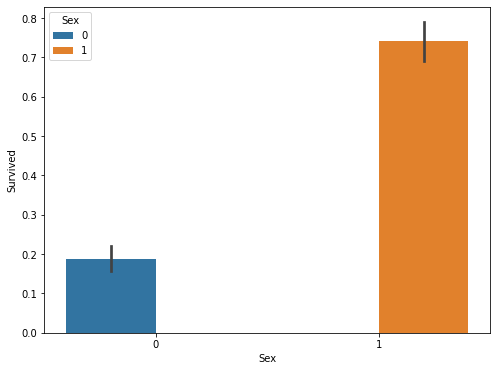

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
ax=sns.barplot(x="Sex", y="Survived", hue=train['Sex'], data=train)
#plt.show()
#print("The percent of males who survived", train["Survived"][train["Sex"]== 'male'].value_counts(normalize =True)[1]*100)
#print("The percent of males who survived: ", train["Survived"][train["Sex"] =='male'].value_counts(normalize = True)[1]*100)
#print("The percent of females who survived: ", train["Survived"][train["Sex"] =='female'].value_counts(normalize = True)[1]*100)


The percentage of First Class survivors who survived is: 62.96296296296296
The percentage of Second Class survivors who survived is: 47.28260869565217
The percentage of Third Class survivors who survived is: 24.236252545824847


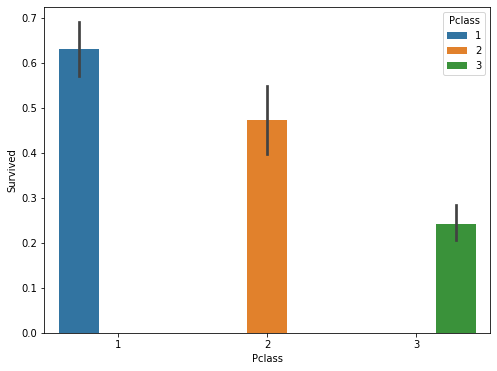

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x="Pclass", y="Survived", hue=train["Pclass"], data=train)
print("The percentage of First Class survivors who survived is:", train["Survived"][train["Pclass"]== 1].value_counts(normalize =True)[1]*100)
print("The percentage of Second Class survivors who survived is:", train["Survived"][train["Pclass"]== 2].value_counts(normalize =True)[1]*100)
print("The percentage of Third Class survivors who survived is:", train["Survived"][train["Pclass"]== 3].value_counts(normalize =True)[1]*100)

53.588516746411486 % of people with one parent and/or child aboard survived.
46.42857142857143 % of people with two parents and/or children aboard survived.
34.53947368421053 % of people with no parents and/or children aboard survived.
25.0 % of people with three parents and/or children aboard survived.


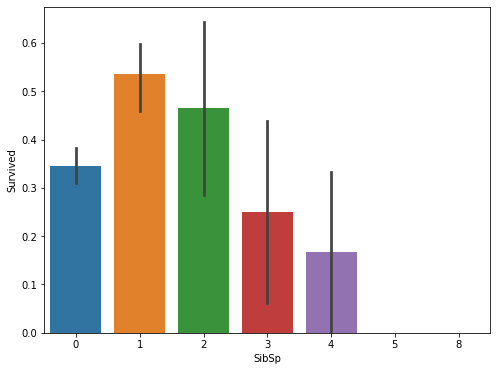

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
ax =sns.barplot(x="SibSp", y="Survived", data=train)
#print("The percentage of passengers with parents/children aboard (SibSp) is "")
print(train["Survived"][train["SibSp"] ==1].value_counts(normalize = True)[1]*100,"% of people with one parent and/or child aboard survived.")
print(train["Survived"][train["SibSp"] ==2].value_counts(normalize = True)[1]*100,"% of people with two parents and/or children aboard survived.")
print(train["Survived"][train["SibSp"] ==0].value_counts(normalize = True)[1]*100,"% of people with no parents and/or children aboard survived.")
print(train["Survived"][train["SibSp"] ==3].value_counts(normalize = True)[1]*100,"% of people with three parents and/or children aboard survived.")
#print(train["Survived"][train["SibSp"] ==4].value_counts(normalize = True)[1]*100,"% of people with four parents and/or children aboard survived.")




from sklearn.model_selection import train_test_split

In [59]:
predictors = train.drop(['Survived', 'PassengerId'], axis =1)
target = train["Survived"]
x=train
y=train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_values) *100, 2)
print(acc_logreg)

In [53]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train, y_train)
y_Pred = svc.predict(x_values) 
acc_svc = round(accuracy_score(y_pred, y_values) + 100, 2)
print(acc_svc)

In [57]:
class_sex_grouping = train.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch        Fare  \
Pclass Sex                                                                     
1      0     455.729508  0.368852  39.339508  0.311475  0.278689   67.226127   
       1     469.212766  0.968085  34.170213  0.553191  0.457447  106.125798   
2      0     447.962963  0.157407  30.678981  0.342593  0.222222   19.741782   
       1     443.105263  0.921053  28.756579  0.486842  0.605263   21.970121   
3      0     455.515850  0.135447  27.453660  0.498559  0.224784   12.661633   
       1     399.729167  0.500000  24.156250  0.895833  0.798611   16.118810   

            FirstClass  SecondClass  
Pclass Sex                           
1      0           1.0          0.0  
       1           1.0          0.0  
2      0           0.0          1.0  
       1           0.0          1.0  
3      0           0.0          0.0  
       1           0.0          0.0

<AxesSubplot:xlabel='Pclass,Sex'>

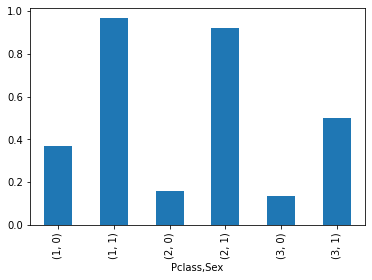

In [59]:
class_sex_grouping['Survived'].plot.bar()

<AxesSubplot:xlabel='Age'>

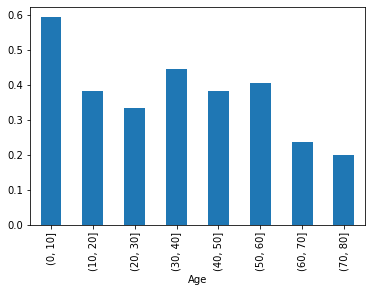

In [62]:

group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [1]:
print("test")

test
